In [1]:
### If save data:
save_data = False

if save_data:
  def ensure_dir(file_path):
    import os
    directory = os.path.dirname(file_path)
    if not os.path.exists(directory):
        os.makedirs(directory)

  from google.colab import drive
  drive.mount('/content/drive')
  %cd drive/My Drive/
  save_dir = "Figs/"
  ensure_dir(save_dir)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import os

!pip install -q git+https://github.com/Pehlevan-Group/kernel-generalization
from kernel_generalization import kernel_simulation as ker_sim
from kernel_generalization import kernel_spectrum as ker_spec
from kernel_generalization import kernel_regression as ker_reg
from kernel_generalization.utils import gegenbauer

!git clone https://github.com/Pehlevan-Group/kernel-generalization.git
directory = os.path.join(os.getcwd(),'kernel-generalization/PrecomputedData/SynthDataPowerlaw/')

from datetime import datetime
import os

Cloning into 'kernel-generalization'...
remote: Enumerating objects: 125, done.
remote: Counting objects: 100% (125/125), done.
remote: Compressing objects: 100% (125/125), done.
remote: Total 558 (delta 62), reused 0 (delta 0), pack-reused 433
Receiving objects: 100% (558/558), 21.84 MiB | 22.99 MiB/s, done.
Resolving deltas: 100% (315/315), done.


In [3]:
def plot_exp_shift(P_vals, All_errs, std_errs, all_mc, std_MC, sol, errs_tot, 
                   alpha, shift, n_idx, directory = None):
    
    All_errs = All_errs[:,:,:,n_idx]
    std_errs = std_errs[:,:,:,n_idx]
    all_mc = all_mc[:,:,n_idx]
    std_MC = std_MC[:,:,n_idx]

    sol = sol[:,:,:,n_idx]
    errs_tot = errs_tot[:,:,n_idx]
    alpha = alpha[n_idx]

    plt.rcParams.update({'font.size': 12})
    fig, axs = plt.subplots(1, 2)
    fig.set_size_inches(7, 4)

    kplot = [1, 2, 3,4]
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
    scale = [1e+9**i for i in range(len(kplot))]
    
    for i in range(len(kplot)):
        for j in range(len(shift)):
            # error_exp = All_errs[j, :, kplot[i]]/All_errs[j, 0, kplot[i]]/scale[i]
            # std_exp = std_errs[j, :, kplot[i]]/All_errs[j, 0, kplot[i]]/scale[i]
            # if j == 0:
            #     axs[0].errorbar(P_vals, error_exp, std_exp, fmt = 'o' , color=colors[i], label='k=%d' % kplot[i])
            # else:
            #     axs[0].errorbar(P_vals, error_exp, std_exp, fmt = 'o' , color=colors[i])
            
            error_theory = sol[j, :, kplot[i]]/sol[j, 0, kplot[i]]/scale[i]
            if j == 0:
              axs[0].plot(P_vals, error_theory, '--', color=colors[i], label='k=%d' % kplot[i])
            else:
              axs[0].plot(P_vals, error_theory, '--', color=colors[i])
            axs[0].set_xscale('log')
            axs[0].set_yscale('log')
            axs[0].set_xlabel(r'P')
            axs[0].set_ylabel(r'$E_k$')
            axs[0].legend()
    
    for j in range(len(shift)):
        error_exp = all_mc[j,:]#/all_mc[j,0]
        std_exp = std_MC[j,:]#/all_mc[j,0]
        alpha_s = alpha+shift[j]

        axs[1].errorbar(P_vals, error_exp, std_exp, fmt = 'o', color=colors[j],label='$\\alpha^*$=%f' % alpha_s)
        
        error_theory = errs_tot[j,:]#/errs_tot[j,0]
        axs[1].plot(P_vals, error_theory, '--', color=colors[j])
        axs[1].set_xscale('log')
        axs[1].set_yscale('log')
        axs[1].set_xlabel(r'P')
        axs[1].set_ylabel(r'$E_g$')
        axs[1].legend()
    
    plt.subplots_adjust(bottom=0.02, right=0.8, top=0.7, left=-0.25)
    fig.set_figheight(7)
    fig.set_figwidth(12)
    fig.set
    plt.xlim([np.amin(P_vals) + 5, np.amax(P_vals)])
    plt.show()

# Cluster Experiments

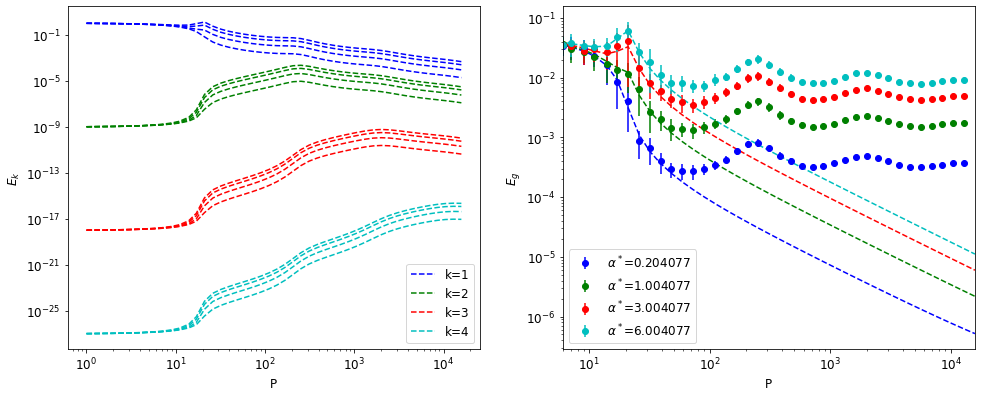

In [4]:
dim = 20

error_theory = np.load(directory+'error_theory_dim_%d.npz'%dim, allow_pickle = True)
P_vals, ModeErr_theory, GenErr_theory, GenErr_asymp,_, params, LargePVals, GenErr_asymp_largeP = [error_theory['arr_'+str(i)] for i in range(len(error_theory.files))]

params = params.tolist()
spec_type = params['spectrum']
degens = params['degens']
lambda_bar = params['lambda_bar']
alpha = params['alpha']
s = params['decay(s)']
dim = params['dim']
kmax = params['kmax']
noise = params['noise']
shift = params['shift']
lamb = params['lamb']


error_exp = np.load(directory+'error_exp_dim_%d.npz'%dim)
ModeErr_exp, GenErr_exp, ModeErr_std, GenErr_std = [error_exp['arr_'+str(i)] for i in range(len(error_exp.files))]

select = np.array([0, 1, 2, 3])

ind = P_vals < 20000

P_vals = P_vals[ind]
ModeErr_exp = ModeErr_exp[:,ind]
GenErr_exp = GenErr_exp[:,ind]
ModeErr_std = ModeErr_std[:,ind]
GenErr_std = GenErr_std[:,ind]
ModeErr_theory = ModeErr_theory[:,ind]
GenErr_theory = GenErr_theory[:,ind]

n_idx = 0
plot_exp_shift(P_vals, ModeErr_exp, ModeErr_std, GenErr_exp, GenErr_std, ModeErr_theory, GenErr_asymp[n_idx], alpha, shift, n_idx);

# Asymptotic Merging Points


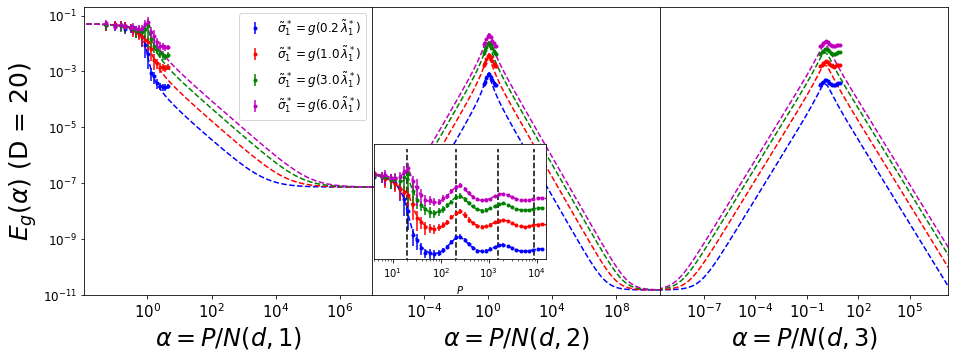

In [5]:
pvals = [LargePVals/degens[1]]
for i in range(1,4):
    pvals += [LargePVals[:]/degens[i+1]]

if dim == 20:
  fig,axs = plt.subplots(1, 3)
  ## For dim = 20
  axs[0].set_xlim(pvals[0][60], pvals[0][-55])
  axs[1].set_xlim(pvals[1][20], pvals[1][-10])
  axs[2].set_xlim(pvals[2][6], pvals[2][-35])
  exp_cut = [[0,20],[20,30],[30,45]]
  axs_labelsize = 15
if dim == 50:
  fig,axs = plt.subplots(1, 2)
  ## For dim = 50
  axs[0].set_xlim(pvals[0][60], pvals[0][-50])
  axs[1].set_xlim(pvals[1][20], pvals[1][-25])
  exp_cut = [[0,25],[25,45],[45,60]]
if dim == 100:
  fig,axs = plt.subplots(1, 2)
  ## For dim = 100
  axs[0].set_xlim(pvals[0][60], pvals[0][-45])
  axs[1].set_xlim(pvals[1][20], pvals[1][-30])
  exp_cut = [[0,30],[30,45],[30,35]]
  axs_labelsize = 15
if dim == 1000:
  fig,axs = plt.subplots(1, 2)
  ## For dim = 100
  axs[0].set_xlim(pvals[0][60], pvals[0][-10])
  axs[1].set_xlim(pvals[1][20], pvals[1][-30])
  exp_cut = [[0,45],[45,45],[30,35]]
  axs_labelsize = 18

plt.rcParams.update({'font.size': 20})
plt.subplots_adjust(bottom=0, top = 1, left = 0, right = len(axs)*2/3, wspace=0)

for i in range(len(axs)):
    axs[i].set_yscale('log')
    axs[i].set_xscale('log')
    axs[i].set_ylim(1e-11, 0.2)
    axs[i].axes.get_yaxis().set_visible(False)

axs[0].axes.get_yaxis().set_visible(True)
axs[0].axes.set_ylabel('$E_g(\\alpha)$ (D = %d)'%dim, fontsize = 25)

colors = ['b', 'r', 'g', 'm', 'c', 'y']
n_idx = 0

for i in range(len(axs)):
    for j in range(len(shift)):
        label_txt = '$\\tilde\sigma_{0}^*=g({1:.1f}\,\\tilde\lambda^*_{0})$'.format(n_idx+1, 1+shift[j])
        cut = exp_cut[i]
        k = i+1
        axs[i].plot(pvals[i], GenErr_asymp_largeP[i,j,:,n_idx],'--', color=colors[j])
        axs[i].errorbar(P_vals[cut[0]:cut[1]]/degens[k], GenErr_exp[j,cut[0]:cut[1],n_idx], 
                        GenErr_std[j,cut[0]:cut[1],n_idx], fmt = '.', color=colors[j],
                        label = label_txt )
        axs[i].set_xlabel('$\\alpha = P/N(d,%d)$'  % k, fontsize = 24)
        axs[i].tick_params('x' , labelsize = axs_labelsize)

axs[0].legend(loc = 'upper right', fontsize = 12)
left, bottom, width, height = [0.67, 0.125, 0.4, 0.4]
inset = fig.add_axes([left, bottom, width, height])

for j in range(len(shift)):
    cut = exp_cut[i]
    k = i+1
    inset.plot(P_vals, GenErr_theory[j,:,n_idx],'--', color=colors[j])
    inset.errorbar(P_vals, GenErr_exp[j,:,n_idx], GenErr_std[j,:,n_idx], fmt = '.', color=colors[j])
    inset.set_xlabel('$P$', fontsize = 10)
    inset.tick_params(axis='x', labelsize=10)
    inset.vlines(degens[j+1],0,0.2,linestyles='dashed')
    inset.set_xlim(P_vals[5],P_vals[-1])

inset.axes.get_yaxis().set_visible(False)

plt.yscale('log')
plt.xscale('log')
if save_data:  plt.savefig(save_dir + 'powerlaw_asymptotic_dim_%d.pdf' %dim, bbox_inches = 'tight');

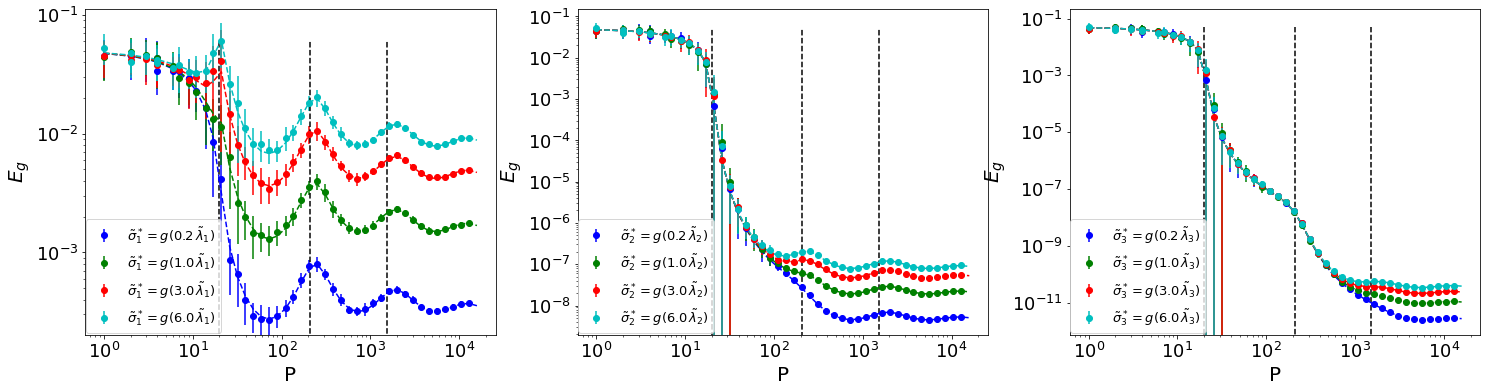

In [6]:
plt.rcParams.update({'font.size': 18})
fig,[ax1, ax2, ax3] = plt.subplots(1,3)

fig.set_size_inches(25,6)

colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

###############################
### k = 1 Noisy regression
###############################

n_idx = 0

for j in range(len(shift)):
    error_exp = GenErr_exp[j,:,n_idx]
    std_exp = GenErr_std[j,:,n_idx]
    alpha_s = alpha+shift[j]

    label_txt = '$\\tilde\sigma_{0}^*=g({1:.1f}\,\\tilde\lambda_{0})$'.format(n_idx+1, 1+shift[j])
    ax1.errorbar(P_vals, error_exp, std_exp, fmt = 'o', color=colors[j],label=label_txt)

    error_theory = GenErr_theory[j,:,n_idx]
    ax1.plot(P_vals, error_theory, '--', color=colors[j])

    ax1.set_xscale('log')
    ax1.set_yscale('log')
    ax1.set_xlabel(r'P',fontsize=20)
    ax1.set_ylabel(r'$E_g$',fontsize=20)


ax1.vlines(degens[1],0,max(error_exp),linestyles='dashed')
ax1.vlines(degens[2],0,max(error_exp),linestyles='dashed')
ax1.vlines(degens[3],0,max(error_exp),linestyles='dashed')

ax1.legend(ncol = 1, loc='lower left', fontsize = 13, bbox_to_anchor=(-0.015,-0.015))   

###############################
### k = 2 Noisy regression
###############################

n_idx = 1

for j in range(len(shift)):
    error_exp = GenErr_exp[j,:,n_idx]
    std_exp = GenErr_std[j,:,n_idx]
    alpha_s = alpha+shift[j]

    label_txt = '$\\tilde\sigma_{0}^*=g({1:.1f}\,\\tilde\lambda_{0})$'.format(n_idx+1, 1+shift[j])
    ax2.errorbar(P_vals, error_exp, std_exp, fmt = 'o', color=colors[j],label=label_txt)

    error_theory = GenErr_theory[j,:,n_idx]
    ax2.plot(P_vals, error_theory, '--', color=colors[j])

    ax2.set_xscale('log')
    ax2.set_yscale('log')
    ax2.set_xlabel(r'P',fontsize=20)
    ax2.set_ylabel(r'$E_g$',fontsize=20)


ax2.vlines(degens[1],0,max(error_exp),linestyles='dashed')
ax2.vlines(degens[2],0,max(error_exp),linestyles='dashed')
ax2.vlines(degens[3],0,max(error_exp),linestyles='dashed')

ax2.legend(ncol = 1, loc='lower left', fontsize = 13, bbox_to_anchor=(-0.015,-0.015))  

###############################
### k = 3 Noisy regression
###############################

n_idx = 2

for j in range(len(shift)):
    error_exp = GenErr_exp[j,:,n_idx]
    std_exp = GenErr_std[j,:,n_idx]
    alpha_s = alpha+shift[j]

    label_txt = '$\\tilde\sigma_{0}^*=g({1:.1f}\,\\tilde\lambda_{0})$'.format(n_idx+1, 1+shift[j])
    ax3.errorbar(P_vals, error_exp, std_exp, fmt = 'o', color=colors[j],label=label_txt)

    error_theory = GenErr_theory[j,:,n_idx]
    ax3.plot(P_vals, error_theory, '--', color=colors[j])

    ax3.set_xscale('log')
    ax3.set_yscale('log')
    ax3.set_xlabel(r'P',fontsize=20)
    ax3.set_ylabel(r'$E_g$',fontsize=20)


ax3.vlines(degens[1],0,max(error_exp),linestyles='dashed')
ax3.vlines(degens[2],0,max(error_exp),linestyles='dashed')
ax3.vlines(degens[3],0,max(error_exp),linestyles='dashed')

ax3.legend(ncol = 1, loc='lower left', fontsize = 13, bbox_to_anchor=(-0.015,-0.015))  

if save_data: plt.savefig(save_dir + 'powerlaw_different_stages.pdf', bbox_inches = 'tight');